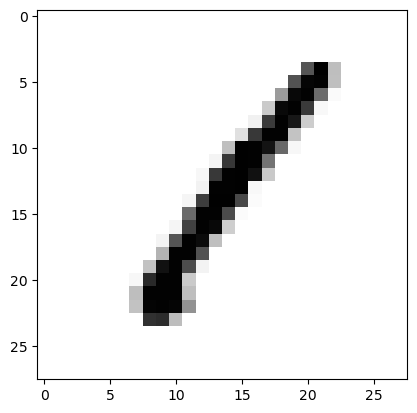

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fname = '/mnt/home/kxs997/Downloads/mnist.csv'
dat = np.loadtxt(fname, delimiter=',')
row = dat[0, 1:]  
reshaped = np.reshape(row, (28, 28))

# Plot
plt.imshow(reshaped, cmap='Greys', interpolation='nearest')
plt.show()

In [8]:
import pandas as pd

fname = '/mnt/home/kxs997/Downloads/titanic_sub.csv'
titanic_data = pd.read_csv(fname)

# inspect data structure
def dataInfo(data):
    print(data.info())

# display first n amount of records
def displayRecords(data, n):
    print(data.head(n))


dataInfo(titanic_data)

displayRecords(titanic_data, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1 

Tenth element -  [0.    0.357]


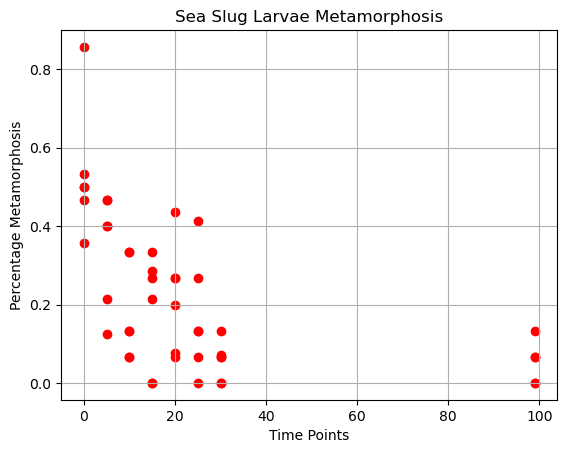

In [20]:
fname = '/mnt/home/kxs997/Downloads/Seaslugs.txt'
dat = np.genfromtxt(fname, skip_header=1)
# 
eten = dat[9]
print("Tenth element - ", eten)


timePoints = dat[:, 0]
percMetamorphosis = dat[:, 1]

# Create a scatter plot
plt.scatter(timePoints, percMetamorphosis, color='r')
plt.title('Sea Slug Larvae Metamorphosis')
plt.xlabel('Time Points')
plt.ylabel('Percentage Metamorphosis')
plt.grid(True)


In [26]:
fname = '/mnt/home/kxs997/Downloads/battledeath.xlsx'
dat = pd.ExcelFile(fname)

print('Sheet names:',dat.sheet_names)

combineDF = pd.DataFrame()

# axis = 1, column wise concatenation
for sheet in dat.sheet_names:
    df = pd.read_excel(dat, sheet)
    combineDF = pd.concat([combineDF, df], axis=1)

print('Combined dataframe:')
print(combineDF)

Sheet names: ['2002', '2004']
Combined dataframe:
    War, age-adjusted mortality due to       2002 War(country)      2004
0                          Afghanistan  36.083990  Afghanistan  9.451028
1                              Albania   0.128908      Albania  0.130354
2                              Algeria  18.314120      Algeria  3.407277
3                              Andorra   0.000000      Andorra  0.000000
4                               Angola  18.964560       Angola  2.597931
..                                 ...        ...          ...       ...
187                          Venezuela   0.000000    Venezuela  0.000000
188                            Vietnam   0.040222      Vietnam  0.037507
189                        Yemen, Rep.   0.074510  Yemen, Rep.  3.602868
190                             Zambia   0.044548       Zambia  0.041963
191                           Zimbabwe  33.796200     Zimbabwe  0.509568

[192 rows x 4 columns]


In [29]:
!pip install sas7bdat

  Preparing metadata (setup.py) ... done
  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16294 sha256=25e2504de76a2e89b831e57248a5a22e8595be18dfa7a90ca2a07cee48448030
  Stored in directory: /mnt/home/kxs997/.cache/pip/wheels/9a/95/86/436431e285591df3980accd5137b3e24f142914036bcb159d8
Successfully built sas7bdat


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


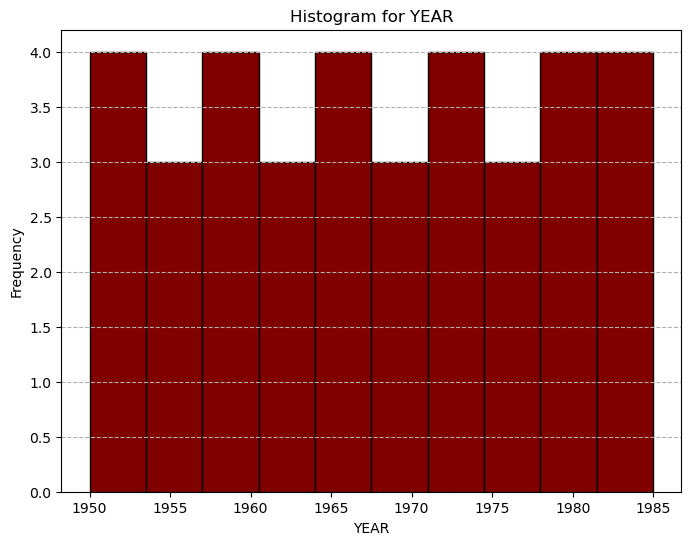

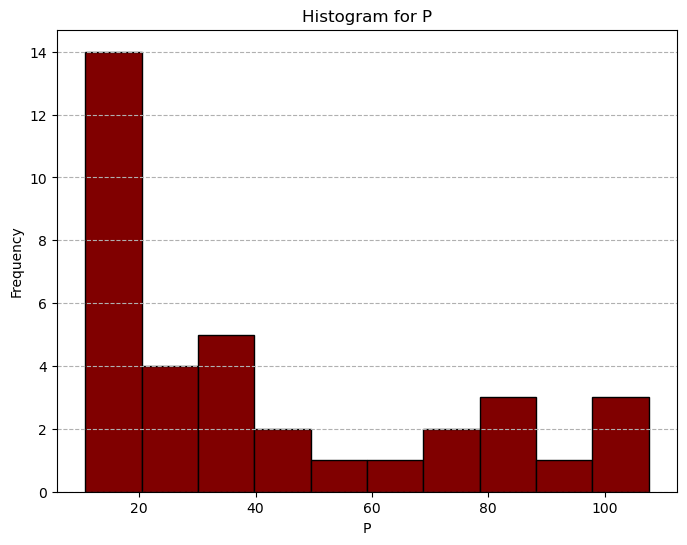

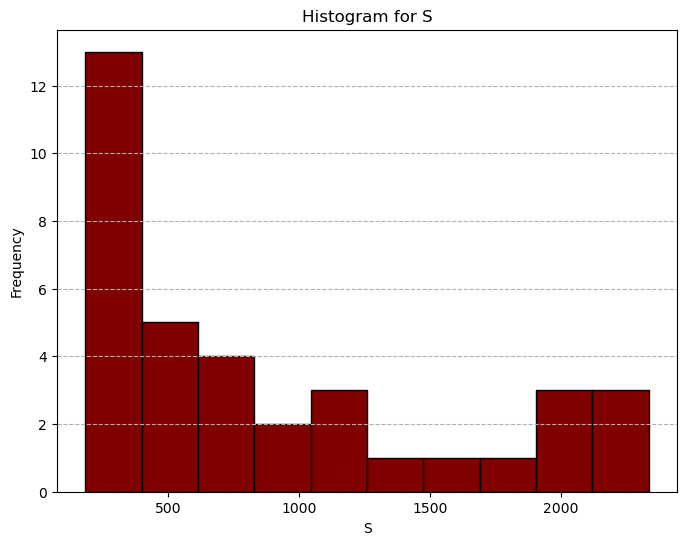

In [43]:
from sas7bdat import SAS7BDAT

fname = '/mnt/home/kxs997/Downloads/sales.sas7bdat'

df = SAS7BDAT(fname).to_data_frame()

# print head
print(df.head())

# Generate histograms to visualize the data columns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='maroon', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

Data type :  <class 'dict'>
Keys:
__header__
__version__
__globals__
rfpCyt
rfpNuc
cfpNuc
cfpCyt
yfpNuc
yfpCyt
CYratioCyt
Data type 'rfpCyt' :  <class 'numpy.ndarray'>
Shape 'rfpCyt' :  (200, 137)


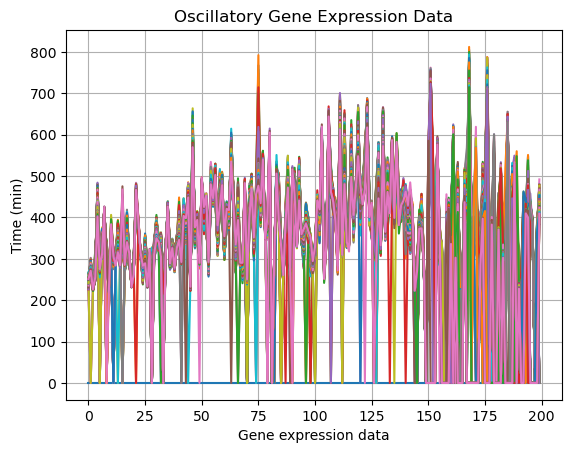

In [47]:
import scipy.io as sio

fname = '/mnt/home/kxs997/Downloads/ja_data2.mat'
dat = sio.loadmat(fname)

# data type
dtype = type(dat)
print("Data type : ", dtype)

# Print the keys
keys = dat.keys()
print("Keys:")
for key in keys:
    print(key)

# key 'rfpCyt'
r_dat = dat['rfpCyt']
r_type = type(r_dat)
r_shape = r_dat.shape

print("Data type 'rfpCyt' : ", r_type)
print("Shape 'rfpCyt' : ", r_shape)

# Plot the data
time = np.arange(r_shape[0])  # Assuming time points are along the first dimension
plt.plot(time, r_dat)
plt.xlabel('Gene expression data')
plt.ylabel('Time (min)')
plt.title('Oscillatory Gene Expression Data')
plt.grid(True)


In [49]:
import requests

url = "http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network"

dat = requests.get(url)
json_dat = dat.json()

# Print key-value pairs of the dictionary json_data
for key, value in json_dat.items():
    print(f"{key}: {value}")

# data frame of json data
df = pd.DataFrame([json_dat])

# Print the DataFrame
print(df)

Title: The Social Network
Year: 2010
Rated: PG-13
Released: 01 Oct 2010
Runtime: 120 min
Genre: Biography, Drama
Director: David Fincher
Writer: Aaron Sorkin, Ben Mezrich
Actors: Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot: As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea and by the co-founder who was later squeezed out of the business.
Language: English, French
Country: United States
Awards: Won 3 Oscars. 173 wins & 186 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore: 95
imdbRating: 7.8
imdbVotes: 737,649
imdbID: tt1285016
Type: movie
DVD: 05 Jun 2012
BoxOffice: $96,962,694
Production: 

In [80]:
from pandas import json_normalize


api_url = "https://api.yelp.com/v3/businesses/search"
api_key = 'i4HKjvSvvQgmsVKjYYuZcC0g1kklvg76mCN1NO6ciij4I5InlZu12EZuIX1kpWObgbKszEuKgOkmQvmvmaltm_U22GYWvlywJY-YGtANxxFRSPTGokw0HejgLIk9ZXYx'  


header = {"Authorization": f"Bearer {api_key}"}
param = {'term': 'cafe', 'location': 'Ohio'}

# get request
response = requests.get(api_url, headers=header, params=param)

# data is json format
cafes = response.json()
cafesDF = json_normalize(cafes, sep='_')

# 'flattened data'
cafes_flat = json_normalize(cafes['businesses'], sep="_")

# columns in cafes and cafes_flat
print("Columns in cafes  :")
print(cafesDF.columns)

print("Columns in cafes_flat : ")
print(cafes_flat.columns)

Columns in cafes  :
Index(['businesses', 'total', 'region_center_longitude',
       'region_center_latitude'],
      dtype='object')
Columns in cafes_flat : 
Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'transactions', 'price', 'phone',
       'display_phone', 'distance', 'coordinates_latitude',
       'coordinates_longitude', 'location_address1', 'location_address2',
       'location_address3', 'location_city', 'location_zip_code',
       'location_country', 'location_state', 'location_display_address'],
      dtype='object')


In [83]:
import mysql.connector

# connection to db orders
connection = mysql.connector.connect(
    host = "129.22.23.234",
    user = "mysql",
    password = "7fRaIU1t15R5Wu",
    database= 'Orders.db')


query = """
SELECT OrderID, CustomerID, YEAR(OrderDate) AS OrderYear, ShipCity, ShippedDate, truncate(sum(unitprice*quantity*(1-discount)+freight),2) 
AS OrderCost 
FROM tblOrders INNER JOIN tblOrderDetails USING (OrderID)
GROUP BY OrderID
"""

orders_df = pd.read_sql(query, connection)


KeyboardInterrupt: 

In [85]:
import numpy as np
cost_by_year_vs_shipcity = pd.pivot_table(
    orders_df, 
    values='OrderCost', 
    index='ShipCity', 
    columns='OrderYear', 
    aggfunc=[np.sum]
)
print(cost_by_year_vs_shipcity["Aache":"Brandenburg"])
# row totals
row_totals = cost_by_year_vs_shipcity.sum(axis=1)

# column totals
column_totals = cost_by_year_vs_shipcity.sum(axis=0)

print("Aggregated row totals:")
print(row_totals)

print("Aggregated column totals:")
print(column_totals)

NameError: name 'orders_df' is not defined

In [84]:

with open('/mnt/home/kxs997/Downloads/compute_totalsales_per_order.sql', 'r') as script_file:
    sql_script = script_file.read()
    cursor.executescript(sql_script)

# Commit and close the connection
connection.commit()
connection.close()

results_df.to_excel('results.xlsx', index=False)

OperationalError: near "Use": syntax error